# Data Driven Science and Engineering
## Chapter 2 - Fourier Transformations
To see explinations of Fourier Transformations, please see the markdown file within this folder

----
importing libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

----
### Example Fourier Series for a continuous Hat Function


$\Biggl\{\begin{align*} 
0 \;for\; x \in [-\pi,-\pi/2 ) \\ 
1+2x/\pi \;for\; x \in [-\pi/2,0) \\
1-2x/\pi \;for\; x\in [0,\pi/2)\\
0 \;for\; x \in [\pi/2,\pi)
\end{align*}$

In [3]:
# define domain
dx = 0.001
L = np.pi
x = np.arange(-1,1,dx) * L
F_x = np.zeros(len(x))
n = int(x.size/4)
# creating function
F_x[0:n] = 0
F_x[n:2*n] = 1 + 2*x[n:2*n]/np.pi
F_x[2*n:3*n] = 1 - 2*x[2*n:3*n]/np.pi
F_x[3*n:]=0

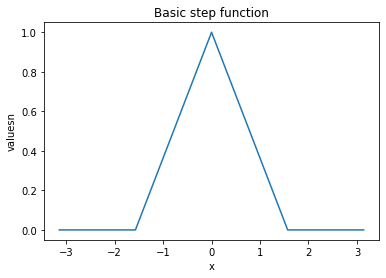

In [4]:
plt.title("Basic step function") 
plt.xlabel("x") 
plt.ylabel("valuesn") 
plt.plot(x,F_x) 
plt.show()

Now doing a fourier transformation on the hat functions

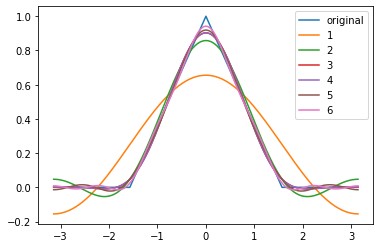

In [13]:
a_0 = np.sum(F_x) * dx 
FFS = a_0/2
plt.plot(x,F_x, label = 'original')
for k in range(1,7):
    inner_portion = np.pi * k * x / L
    a_k = sum(F_x * np.cos(inner_portion)) * dx
    b_k = sum(F_x * np.sin(inner_portion)) * dx
    FFS = FFS + a_k * np.cos(inner_portion) + b_k * np.sin(inner_portion)
    plt.plot(x, FFS, label = k)
plt.legend()
plt.show()

You can clearly see that the function starts to get really good at about the 4th frequency (k = 4)

#### Example disconitiouns hat function
$\Biggl\{\begin{align*} 
0 \;for\; x \in [0,L/4) \\ 
1 \;for\; x \in [L/4,3L/4) \\
0 \;for\; x\in [3L/4,L)\\
\end{align*}$

In [36]:
# define domain
dx = 0.01
L = 10
x = np.arange(0,L,dx)
F_x = np.zeros(len(x))
n = int(x.size/4)
# creating function
F_x[0:n] = 0
F_x[n:2*3*n] = 1
F_x[3*n:]=0

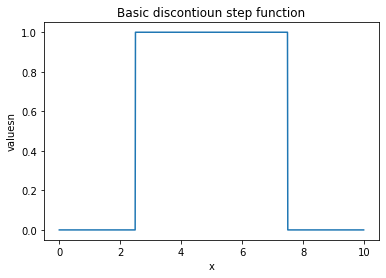

In [37]:
plt.title("Basic discontioun step function") 
plt.xlabel("x") 
plt.ylabel("valuesn") 
plt.plot(x,F_x) 
plt.show()

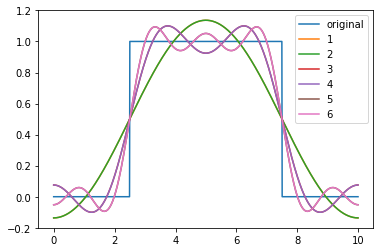

In [39]:
a_0 = np.sum(F_x) * dx * 2.0/L
FFS = a_0/2
plt.plot(x,F_x, label = 'original')
for k in range(1,7):
    inner_portion = 2.0 * np.pi * k * x / L
    a_k = (2.0/L) * sum(F_x * np.cos(inner_portion)) * dx
    b_k = (2.0/L) * sum(F_x * np.sin(inner_portion)) * dx 
    FFS = FFS + a_k * np.cos(inner_portion) + b_k * np.sin(inner_portion)
    plt.plot(x, FFS, label = k)
plt.legend()
plt.show()

Looks pretty good, let's go for 100 itteration, showing every 25ht

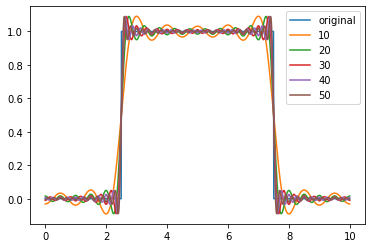

In [42]:
a_0 = np.sum(F_x) * dx * 2.0/L
FFS = a_0/2
plt.plot(x,F_x, label = 'original')
for k in range(1,51):
    inner_portion = 2.0 * np.pi * k * x / L
    a_k = (2.0/L) * sum(F_x * np.cos(inner_portion)) * dx
    b_k = (2.0/L) * sum(F_x * np.sin(inner_portion)) * dx 
    FFS = FFS + a_k * np.cos(inner_portion) + b_k * np.sin(inner_portion)
    if k % 10 == 0:
        plt.plot(x, FFS, label = k)
plt.legend()
plt.show()